In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from skimage import io
from  tqdm import tqdm

import sys
sys.path.append('../scripts/')
from process_images import framework

In [2]:
matplotlib.rcParams['figure.labelsize']= 20
matplotlib.rcParams['axes.titlesize']= 20

In [3]:
x = np.linspace(0.5, 5.5, 101)
S = np.zeros(101)
for i in tqdm(range(len(x))):
    img0 = io.imread('../exp-data/20251201/28/60_1_50-1050/{:.2f}s.tif'.format(x[i]), as_gray=True)
    S_len0, sk0  = framework(img0, hysteresis_th=[0.15, 0.25], skleton_img=True)
    S[i]= S_len0

100%|██████████| 101/101 [03:22<00:00,  2.00s/it]


-0.5901513212453895 [0.01729187]


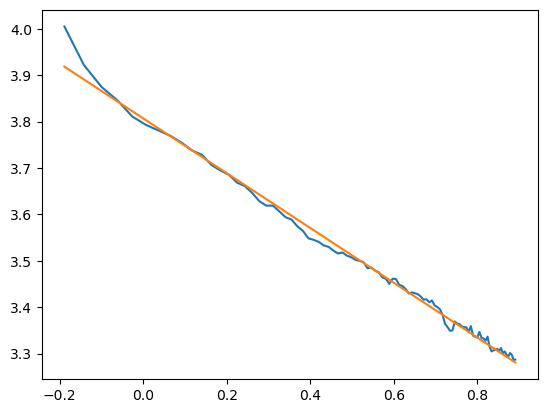

In [20]:
x_ = np.linspace(0.5, 5.5 * 10/7, 101)
a,b = 2,-1
plt.plot(np.log10(x_[a:b]), np.log10(S[a:b]))
res = np.polyfit(np.log10(x_[a:b]), np.log10(S[a:b]), deg=1, full=True)
plt.plot(np.log10(x_[a:b]), res[0][0]*np.log10(x_[a:b]) + res[0][1])
print(res[0][0], res[1])

In [3]:
img0 = io.imread('../exp-data/20251201/28/60_5/{:.2f}s.tif'.format(1.65), as_gray=True)
S_len0, S_den0, sk0  = framework(img0, hysteresis_th=[0.15, 0.25], skleton_img=True)

9753.850931962073 4801.559219996285


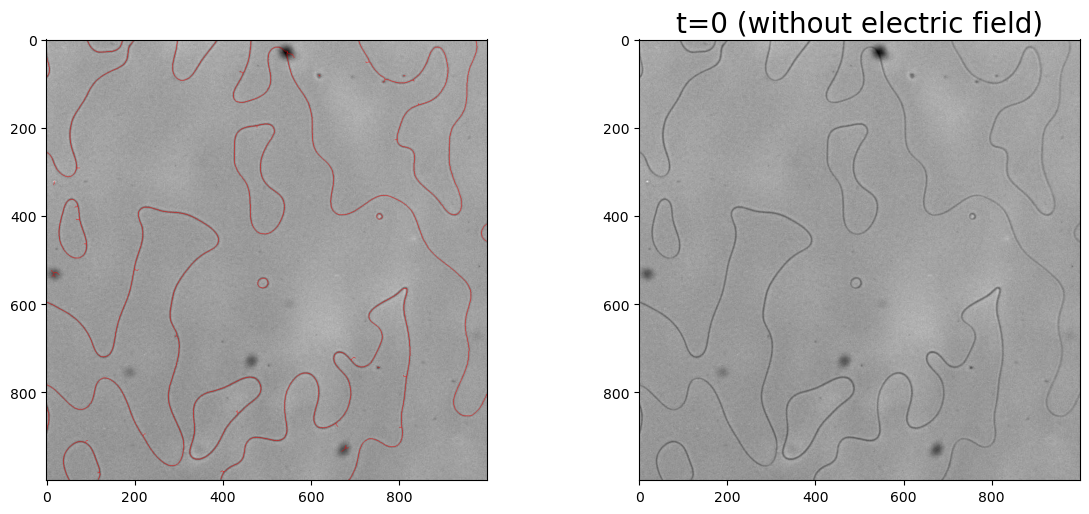

In [4]:

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

skeleton0 = sk0.astype(bool)
img0_norm = (img0 - img0.min()) / (img0.max() - img0.min())

img0_rgb = np.dstack([img0_norm, img0_norm, img0_norm])
overlay0 = img0_rgb.copy()
overlay0[skeleton0] = [1.0, 0.0, 0.0]

plt.tight_layout()

ax1.imshow(overlay0)
ax2.imshow(img0, cmap='gray')
plt.title('t=0 (without electric field)')
# plt.savefig('../figs/60V_dyn_0.png')
print(S_len0,S_den0)

In [ ]:
img0 = io.imread('../exp-data/20251201/28/60_1_50-1050/0.51 s.tif.', as_gray=True)
